# Dog-vs-Cat classification

In this tutorial, we are going to follow transfer learning approach where we will use a pre-trained CNN model called as MobileNetV2 model.

We are going to use Kaggle dataset - dogs-vs-cats

In [1]:
# Installing kaggle library
!pip install kaggle

In [2]:
# Configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Dog vs Cat dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:25<00:00, 34.2MB/s]
100% 812M/812M [00:25<00:00, 32.9MB/s]


In [4]:
# Extract dogs-vs-cats.zip file
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [5]:
# Now extracting train.zip file because we are interested in training data to train the model.
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [40]:
# printing content in train folder using os module
import os
files = os.listdir('train')
# printing only starting 10 files
print(files[0:10])

['dog.8141.jpg', 'dog.9407.jpg', 'cat.3605.jpg', 'cat.7336.jpg', 'cat.11131.jpg', 'dog.8163.jpg', 'dog.7681.jpg', 'dog.12071.jpg', 'dog.4392.jpg', 'dog.378.jpg']


In [41]:
# Printing number of images present in train folder
print(f"The number of images: {len(files)}")

The number of images: 25000


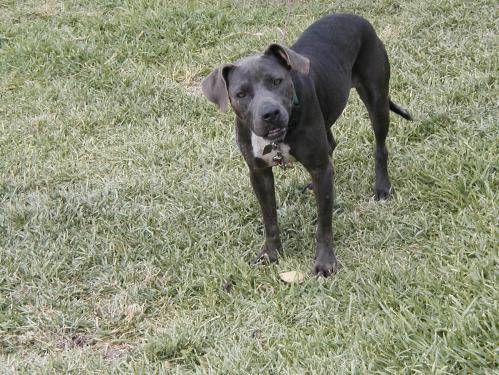

In [42]:
# Displaying one of the images
from IPython.display import Image
Image(f'train/{files[0]}')

In [43]:
# Checking if dogs and cats images are equal in number
dog_count = 0
cat_count = 0
for file in files:
  if file[:3] == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print(f"Number of dogs: {dog_count}")
print(f"Number of cats: {cat_count}")

Number of dogs: 12500
Number of cats: 12500


In [44]:
# Importing required dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [11]:
# Resizing the images to the same dimension and storing them into different directory
os.mkdir('resized_train')

In [12]:
for i in range(2000):
  file = files[i]
  img = Image.open(f'train/{file}')
  img = img.resize((224, 224))
  img = img.convert('RGB')
  img.save(f'resized_train/{file}')

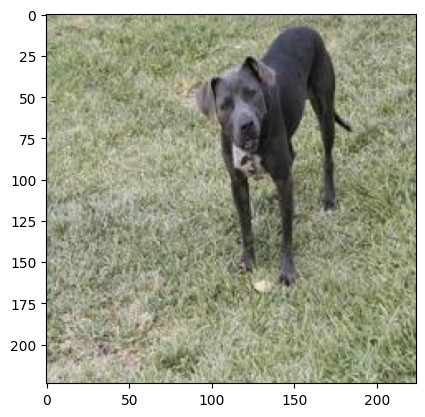

In [45]:
# Displaying one of the images from resized_train using matplotlib.image so that we could see the dimension of the image
img = mpimg.imread(f'resized_train/{files[0]}')
plt.imshow(img)

The size has been resized to 224x224

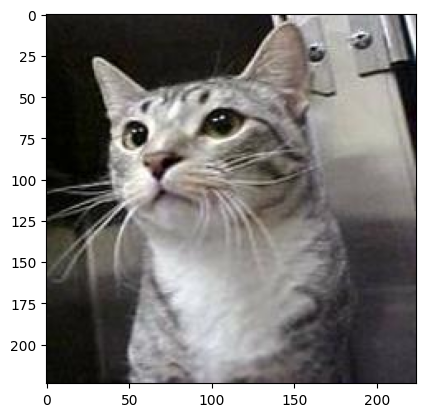

In [46]:
# Displaying one of the cat images from resized_train using matplotlib.image
img = mpimg.imread(f'resized_train/{files[3]}')
plt.imshow(img)

In [47]:
# Creating labels such that cat is 0 and dog is 1
labels = []
resized_files = os.listdir('resized_train')
for file in resized_files:
  if file[:3] == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [48]:
# Checking whether the images have been correctly labeled
print(resized_files[0:10])
print(labels[0:10])

['dog.8141.jpg', 'dog.9407.jpg', 'cat.3605.jpg', 'cat.7336.jpg', 'cat.11131.jpg', 'dog.8163.jpg', 'dog.7681.jpg', 'dog.12071.jpg', 'dog.4392.jpg', 'dog.378.jpg']
[1, 1, 0, 0, 0, 1, 1, 1, 1, 1]


In [49]:
# Checking 0 and 1 labels are equal in count
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1041  959]


In [50]:
import cv2
import glob

In [51]:
# Converting resized_images into numpy array
images_extension = ['*.jpg', '*.png']
images_to_numpy = []
for ext in images_extension:
  for file in glob.glob(f'resized_train/{ext}'):
    img = cv2.imread(file)
    images_to_numpy.append(img)

In [52]:
print(images_to_numpy[0])

[[[122 155 151]
  [140 173 169]
  [143 176 172]
  ...
  [148 178 173]
  [128 158 153]
  [100 130 125]]

 [[135 168 164]
  [121 154 150]
  [112 145 141]
  ...
  [133 163 158]
  [132 162 157]
  [118 148 143]]

 [[117 150 146]
  [136 169 165]
  [128 159 156]
  ...
  [130 157 153]
  [125 152 148]
  [119 146 142]]

 ...

 [[179 191 185]
  [169 181 175]
  [172 183 180]
  ...
  [151 180 171]
  [170 197 188]
  [144 171 162]]

 [[165 175 169]
  [163 173 167]
  [171 180 177]
  ...
  [145 172 163]
  [164 191 182]
  [154 181 172]]

 [[174 181 176]
  [187 194 189]
  [186 195 192]
  ...
  [133 160 151]
  [138 165 156]
  [166 193 184]]]


In [53]:
print(type(images_to_numpy[0]))

<class 'numpy.ndarray'>


In [54]:
# Checking the shape of image
print(images_to_numpy[0].shape)

(224, 224, 3)


In [55]:
# Creating 'X' and 'Y' variables for 'images_to_numpy' and 'labels'
X = np.array(images_to_numpy)
Y = np.array(labels)

In [56]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [57]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 224, 224, 3)
(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


- 20000 training data
- 5000 test data

In [59]:
# Normalising the training and test data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### **Importing MobileNetV2 model**

In [60]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

In [61]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [62]:
pretrained_model = hub.KerasLayer(mobilenet_v2, input_shape=(224, 224, 3), trainable=False)

In [63]:
num_of_classes = 2 # because there are two classes, Cat (0) and Dog (1)
model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [65]:
model.compile(
    optimizer='adam',
    loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [66]:
# Training the model
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 5s 41ms/step - loss: 0.2577 - acc: 0.8919
Epoch 2/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0763 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0572 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 2s 44ms/step - loss: 0.0463 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 2s 48ms/step - loss: 0.0381 - acc: 0.9931


In [67]:
# Evaluating our trained model on test data
score, acc = model.evaluate(X_test_scaled, Y_test)

13/13 [==============================] - 1s 41ms/step - loss: 0.0478 - acc: 0.9850


In [68]:
# Checking test loss and accuracy
print('Test loss:', score)
print('Test accuracy:', acc)

Test loss: 0.04777233302593231
Test accuracy: 0.9850000143051147


1/1 [==============================] - 0s 47ms/step
It is a dog image.


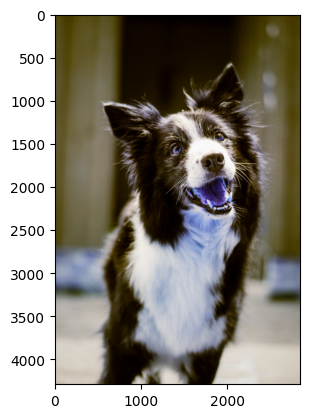

In [86]:
# Predictive system
# The predictive system can get the image of any size. So we need to resize the image into (224, 224, 3) dimension.
image_path = 'dog.jpg'
image_read = cv2.imread(image_path)
plt.imshow(image_read)

# Resizing the image into (224, 224) dimension
image_resized = cv2.resize(image_read, (224, 224))

# Normalising the image for better performance
image_scaled = image_resized/255

# Reshaping the image into one dimension so that we could feed it to the model
image_reshaped = np.reshape(image_scaled, [1, 224, 224, 3])

# Predicting the image
prediction = model.predict(image_reshaped)

# Converting prediction probabilities into labels
prediction_label = np.argmax(prediction)

if prediction_label == 0:
  print('It is a cat image.')
else:
  print('It is a dog image.')

1/1 [==============================] - 0s 37ms/step
It is a cat image.


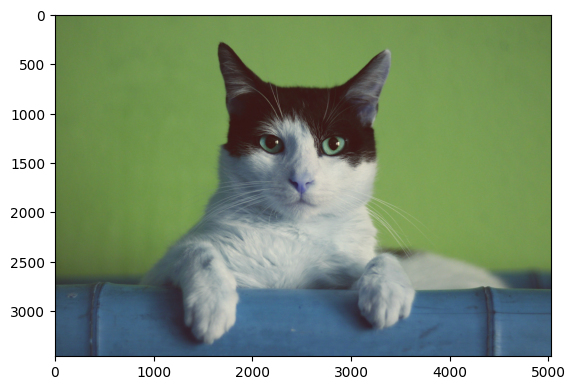

In [87]:
# Same thing for cat image

image_path = 'cat.jpg'
image_read = cv2.imread(image_path)
plt.imshow(image_read)

# Resizing the image into (224, 224) dimension
image_resized = cv2.resize(image_read, (224, 224))

# Normalising the image for better performance
image_scaled = image_resized/255

# Reshaping the image into one dimension so that we could feed it to the model
image_reshaped = np.reshape(image_scaled, [1, 224, 224, 3])

# Predicting the image
prediction = model.predict(image_reshaped)

# Converting prediction probabilities into labels
prediction_label = np.argmax(prediction)

if prediction_label == 0:
  print('It is a cat image.')
else:
  print('It is a dog image.')

You can also create predictive system that takes an image from the user as input.
The code below is as follows:
```
image_path = input('Path of the image to be predicted: ')
```
An input box will appear where you need to insert the path of the image.

### That's it.

### I hope you like this tutorial.

In [88]:
# Thank You